<a href="https://colab.research.google.com/github/kanaka-22/Healthy-unhealthy_eyes/blob/main/Healthy_%26_Unhealthy_Human_Eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import os
import cv2

In [ ]:
healthy='/content/drive/MyDrive/Human_Eyes/Healthy human eyes'
unhealthy='/content/drive/MyDrive/Human_Eyes/Unhealthy human eyes'

In [ ]:
from glob import glob
healthy_files = glob(healthy + '/*')
unhealthy_files = glob(unhealthy + '/*')


In [ ]:
print("First 5 Healthy Files: ",healthy_files[0:10])
print("Total Count: ",len(healthy_files))
print("First 5 Unhealthy Files: ",unhealthy_files[0:10])
print("Total Count: ",len(unhealthy_files))


First 5 Healthy Files:  ['/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.OCHvl8xTME9lid2PAqV23wHaFL.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.0HdzThf4bMriaa37yProIgHaE7.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.EzniwM0DrpUdW39vD76aXQHaEF.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.ScMYvwgMKQ4dXSWQ57g8hQHaEK.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.P-sdSKHR09cgs6T_5hX6WAHaFJ.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.9soZ3FBQ7JVGjCVNs9pw1QHaGX.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.avPkbJAy8uze95pd0lzJQAHaEK.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/Unknown-10', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/images-16.jpeg', '/content/drive/MyDrive/Human_Eyes/Healthy human eyes/OIP.iX0GvM1G4xyKz21N1_FGtwHaEK.jpeg']
Total Count:  40
First 5 Unhealthy Files:  ['/content/drive/MyDrive/Human_Eyes/Unhealthy human eyes/O

In [ ]:
healthy_labels = []
unhealthy_labels = []
healthy_images = []
unhealthy_images = []

In [ ]:
for i in range(len(healthy_files)):
  import cv2 
  image = cv2.imread(healthy_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  healthy_images.append(image)
  healthy_labels.append('Healthy Eye')

In [ ]:
for i in range(len(unhealthy_files)):
  import cv2 
  image = cv2.imread(unhealthy_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  unhealthy_images.append(image)
  unhealthy_labels.append('Unhealthy Eye')

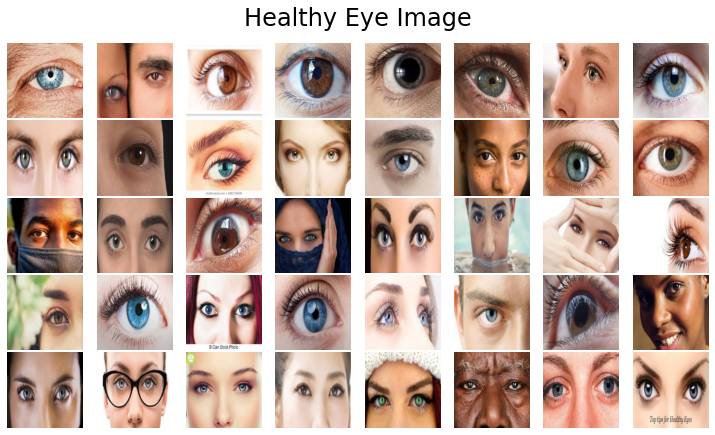

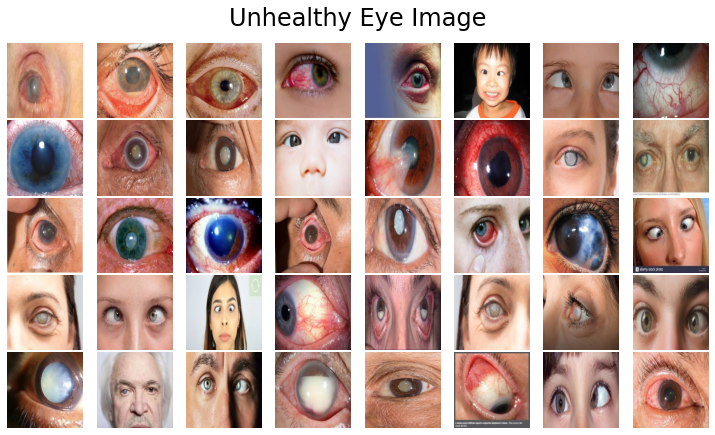

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))
    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()
    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(healthy_images, 'Healthy Eye Image')
plot_images(unhealthy_images, 'Unhealthy Eye Image')

In [ ]:
healthy_images = np.array(healthy_images) / 255
unhealthy_images = np.array(unhealthy_images) / 255
healthy_labels = np.array([1 for _ in range(len(healthy_images))])
unhealthy_labels = np.array([0 for _ in range(len(unhealthy_images))])

In [ ]:
from sklearn.model_selection import train_test_split
healthy_x_train, healthy_x_test, healthy_y_train, healthy_y_test = train_test_split(healthy_images, healthy_labels, test_size=0.2)
unhealthy_x_train, unhealthy_x_test, unhealthy_y_train, unhealthy_y_test = train_test_split(unhealthy_images, unhealthy_labels, test_size=0.2)
X_train = np.concatenate((unhealthy_x_train[:80], healthy_x_train[:80]), axis=0)
X_test = np.concatenate((unhealthy_x_test[80:], healthy_x_test[80:]), axis=0)
y_train = np.concatenate((unhealthy_y_train[:80], healthy_y_train[:80]), axis=0)
y_test = np.concatenate((unhealthy_y_test[80:], healthy_y_test[80:]), axis=0)

In [ ]:
print("Number of samples in train and test are %d and %d.",(X_train.shape[0],X_test.shape[0]))

Number of samples in train and test are %d and %d. (76, 0)


In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_aug = ImageDataGenerator(rescale=1. /255)

In [ ]:
model = tf.keras.models.Sequential([
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 788544)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               403735040 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 403,737,345
Trainable params: 403,737,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=0.0001),metrics=["accuracy"])

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // 64,
                    steps_per_epoch=len(X_train) // 64,
                    epochs=20)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.8768 - accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 9s 9s/step - loss: 0.7402 - accuracy: 0.6562
Epoch 3/20
1/1 [==============================] - 9s 9s/step - loss: 0.9037 - accuracy: 0.6406
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 1.3701 - accuracy: 0.4167
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 1.8050 - accuracy: 0.5833
Epoch 6/20
1/1 [==============================] - 5s 5s/step - loss: 0.5565 - accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 8s 8s/step - loss: 0.8458 - accuracy: 0.6562
Epoch 8/20
1/1 [==============================] - 5s 5s/step - loss: 1.0984 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 8s 8s/step - loss: 1.0694 - accuracy: 0.6094
Epoch 10/20
1/1 [==============================] - 8s 8s/step - loss: 0.9152 - accuracy: 0.5781
Epoch 11/20
1/1 [==============================] 